In [1]:
import xarray as xr
import numpy as np
from cgeniepy.grid import GridOperation

from cgeniepy.array import GriddedData
from cgeniepy.plot import CommunityPalette
#bathy_cmap = CommunityPalette('parula_r')
bathy_cmap = CommunityPalette('cmocean_haline_r')

import  matplotlib.pyplot  as plt
import cartopy.crs as ccrs

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def plot_genie_bathy(file,ax,*args, **kwargs):
    genie_topo = np.loadtxt(file)
    genie_topo = np.flipud(genie_topo)
    go = GridOperation()
    lat = go.get_genie_lat()
    lon = go.get_genie_lon()

    ## create xarray data
    genie_topo = xr.DataArray(
        genie_topo,
        dims = ['lat','lon'],
        coords = [lat, lon],
        attrs = {
            'units':'m',
            'long_name':'Depth of the ocean floor'
        }
    )

    genie_topo = genie_topo.where(genie_topo!=0, np.nan)
    genie_topo_plot = GriddedData(genie_topo, attrs=genie_topo.attrs).to_GriddedDataVis()
    genie_topo_plot.aes_dict['pcolormesh_kwargs']['cmap'] = bathy_cmap.colormap
    genie_topo_plot.aes_dict['pcolormesh_kwargs']['vmax'] = 5000
    genie_topo_plot.aes_dict['facecolor_kwargs']['c'] = '#636363'

    genie_topo_plot.plot(ax=ax, *args, **kwargs)

def plot_hadcm3_bathy(file):
    hadcm3_mask = xr.open_dataset(file)['depthdepth']

    hadcm3_mask.attrs['units'] = 'm'
    hadcm3_mask.attrs['long_name'] = 'Depth of the ocean floor'

    hadcm3_plot = GriddedData(hadcm3_mask, attrs=hadcm3_mask.attrs).to_GriddedDataVis()
    hadcm3_plot.aes_dict['pcolormesh_kwargs']['cmap'] = bathy_cmap.colormap
    hadcm3_plot.aes_dict['facecolor_kwargs']['c'] = '#636363'
    hadcm3_plot.aes_dict['pcolormesh_kwargs']['vmax'] = 5000

    return hadcm3_plot

def plot_topography(exp_id, ax1, ax2):

    hadcm3_mask = f'./{exp_id}/{exp_id}.qrparm.omask.nc'
    hadcm3_plot = plot_hadcm3_bathy(hadcm3_mask)
    genie_depth = f"../OUTPUT.EXAMPLES/wor{exp_id}/wor{exp_id}.depth.dat"
    plot_genie_bathy(genie_depth, ax2)


    return hadcm3_plot.plot(ax=ax1)

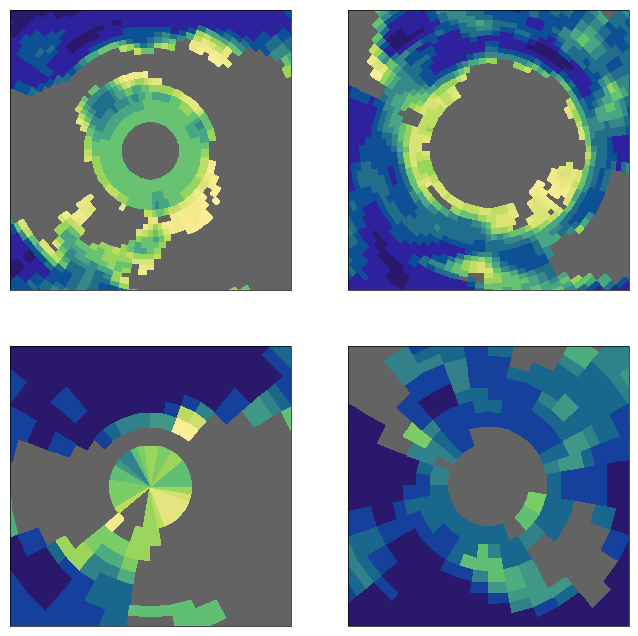

In [88]:
## plot Acrtic bathymeetry
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(221, projection=ccrs.NorthPolarStereo())
ax2 = fig.add_subplot(222, projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(223, projection=ccrs.NorthPolarStereo())
ax4 = fig.add_subplot(224, projection=ccrs.SouthPolarStereo())

ax.set_extent([-180, 180, 30, 90], ccrs.PlateCarree())
ax2.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax3.set_extent([-180, 180, 30, 90], ccrs.PlateCarree())
ax4.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

id = 'tflmh'
hadcm3_plot = plot_hadcm3_bathy(f"/Users/yingrui/muffingen/INPUT.EXAMPLES/{id}/{id}.qrparm.omask.nc")
hadcm3_plot.plot(ax=ax)
hadcm3_plot.plot(ax=ax2)

plot_genie_bathy(f"/Users/yingrui/muffingen/OUTPUT.EXAMPLES/wor{id}/wor{id}.depth.dat", ax3)
plot_genie_bathy(f"/Users/yingrui/muffingen/OUTPUT.EXAMPLES/wor{id}/wor{id}.depth.dat", ax4)

/var/folders/rq/vks10_qx2l9b08d_pygvwfzh0000gn/T/ipykernel_50119/976689562.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig("./topo_overview.pdf", dpi=300, bbox_inches='tight')
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


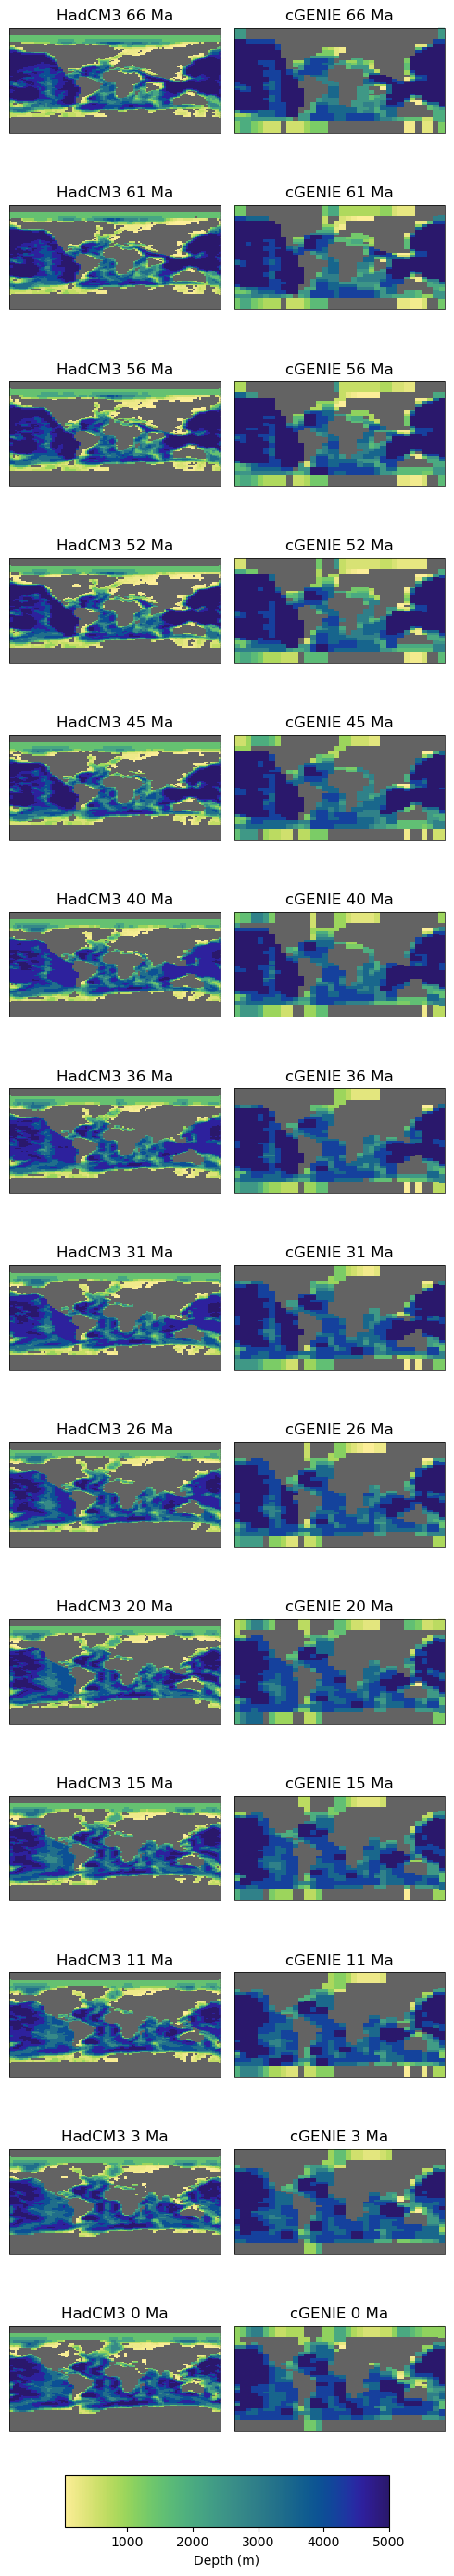

In [99]:
## input data
exp_dics = {
         'tflmn': 66,
        'tflmm': 61,
        'tflml': 56,
         'tflmk':52,
         'tflmj': 45,
          'tflmi': 40,
          'tflmh': 36,
          'tflmg': 31,
         'tflmf': 26,
         'tflme': 20,
        'tflmd': 15,
         'tflmc': 11,
        'tflmb': 3,
        'tflma': 0
}


n_exp = len(exp_dics)

fig, axs = plt.subplots(n_exp,2, figsize=(5, 2*n_exp), subplot_kw={'projection': ccrs.PlateCarree()},
                         tight_layout=True)

for i,j in enumerate(exp_dics.keys()):
    p = plot_topography(j, ax1=axs[i,0], ax2= axs[i,1])
    ## add age
    age = list(exp_dics.values())[i]
    axs[i,0].set_title(f"HadCM3 {age} Ma")
    axs[i,1].set_title(f"cGENIE {age} Ma")

## add a colorbar
## add col_ax (horizontal)
col_ax = fig.add_axes([0.15, 0.0, 0.7, 0.02])
cbar = fig.colorbar(p, cax=col_ax, orientation='horizontal')
cbar.set_label('Depth (m)')

fig.savefig("./topo_overview.pdf", dpi=300, bbox_inches='tight')    